### Contact on balls inside strike zone

Seasons 12-14:
```python
df["ruth"] = (df["pitcher_ruthlessness"]
              * (1 + 0.2*df["pitcher_vibes"])
              * df["pitcher_multiplier"])

df["combined_batting"] = (1/2) * (
    df["batter_divinity"] * df["batter_multiplier"]
    + df["batter_musclitude"] * df["batter_multiplier"]
    + df["batter_thwackability"] * df["batter_multiplier"]
    - df["batter_patheticism"] / df["batter_multiplier"]
) * (1 + 0.2 * df["batter_vibes"])
              
dfc["ballpark_sum"] = (dfc["fort_center"]+ 3*dfc["visc_center"] - 6*dfc["fwd_center"]) / 10

dfc["threshold"] = (
    0.8
    - 0.08*dfc["ruth"]
    + 0.16*dfc["ballpark_sum"]
    + 0.16*dfc["combined_batting_1.2"]
)
dfc.loc[(dfc["threshold"] > 0.9), "threshold"] = 0.9
```

Season 15:
```python
# other definitions same as above
dfc["threshold"] = (
    0.78
    - 0.08*dfc["ruth"]
    + 0.16*dfc["ballpark_sum"]
    + 0.17*dfc["combined_batting_1.2"]
)
dfc["threshold_plot"] = dfc["threshold"].copy()

dfc.loc[(dfc["threshold"] > 0.925), "threshold"] = 0.925
```

In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE
all_files = glob.glob("../roll_data/*-contact.csv")

df = pd.concat((pd.read_csv(f, dtype={"stadium_id": "string", "is_strike": "boolean"}) for f in all_files),
               ignore_index=True)

seasons = [11, 12, 13, 14]
# seasons = [11, 12, 13]
# seasons = [13]
# seasons = [14]
df = df[df['season'].isin(seasons)]
len(df)

411000

In [2]:
df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"), "pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"), "batter_vibes"] = 0
df.loc[df["fielder_mods"].astype(str).str.contains("SCATTERED"), "fielder_vibes"] = 0

df["ruth"] = df["pitcher_ruthlessness"] * (1 + 0.2*df["pitcher_vibes"]) * df["pitcher_multiplier"]
df["combined_batting"] = (1/2) * (
    df["batter_divinity"] * df["batter_multiplier"]
    + df["batter_musclitude"] * df["batter_multiplier"]
    + df["batter_thwackability"] * df["batter_multiplier"]
    - df["batter_patheticism"] / df["batter_multiplier"]
) * (1 + 0.2 * df["batter_vibes"])

In [12]:
dfc = df.copy()
dfc = dfc[dfc["is_strike"] == True]

# dfc = dfc[~((dfc["season"] == 11) & (dfc["day"] == 98))] # bad data here

for exclude_mod in ["GROWTH", "TRAVELING", "SHELLED", "CHUNKY", "SMOOTH", "ON_FIRE"]:
    dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
    # dfc = dfc[~dfc["fielder_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]

dfc = dfc[~(dfc["batting_team_mods"].astype(str).str.contains("O_NO") & (dfc["ball_count"] == 0))]
# dfc = dfc[(dfc["pitcher_multiplier"] == 1) & (dfc["batter_multiplier"] == 1)]
dfc_bad = dfc[dfc["combined_batting"] < 0].copy()
dfc = dfc[dfc["combined_batting"] >= 0]
len(dfc)

237139

In [13]:
# hall of shame
dfc_bad.groupby("batter_name").size()

batter_name
Caleb Novak          839
Chorby Short          78
Combs Estes          143
Concrete Mandible    234
Declan Suzanne       162
Gallup Crueller       35
Morrow Wilson        609
Rat Batson           326
Spears Taylor        233
Theo King            144
Wyatt Glover         139
dtype: int64

In [5]:
dfc.loc[dfc["passed"], "roll"].max()

0.9248548571765144

In [20]:

dfc["combined_batting_1.5"] = (dfc["combined_batting"])**(1.5)
dfc["combined_batting_0.5"] = (dfc["combined_batting"])**(0.5)
dfc["combined_batting_1.25"] = (dfc["combined_batting"])**(1.25)
dfc["combined_batting_0.25"] = (dfc["combined_batting"])**(0.25)
dfc["combined_batting_1.3"] = (dfc["combined_batting"])**(1.3)
dfc["combined_batting_0.3"] = (dfc["combined_batting"])**(0.3)
dfc["combined_batting_1.2"] = (dfc["combined_batting"])**(1.2)

dfc["grand_center"] = dfc["ballpark_grandiosity"] - 0.5
dfc["fort_center"] = dfc["ballpark_fortification"] - 0.5
dfc["obt_center"] = dfc["ballpark_obtuseness"] - 0.5
dfc["om_center"] = dfc["ballpark_ominousness"] - 0.5
dfc["inc_center"] = dfc["ballpark_inconvenience"] - 0.5
dfc["visc_center"] = dfc["ballpark_viscosity"] - 0.5
dfc["fwd_center"] = dfc["ballpark_forwardness"] - 0.5
dfc["myst_center"] = dfc["ballpark_mysticism"] - 0.5
dfc["elong_center"] = dfc["ballpark_elongation"] - 0.5

dfc["ballpark_sum"] = (dfc["fort_center"] + 3*dfc["visc_center"] - 6*dfc["fwd_center"]) / 10

# we know the intercept is 0.4 in s12/s13 and 0.35 in s14/s15 so special case it here so the fit works across
# dfc.loc[dfc["season"] == 13,"roll"] -= 0.05
# dfc.loc[dfc["season"] == 14,"roll"] -= 0.05

In [21]:
# dfc_bad = dfc[dfc["batter_name"].isin(hall_of_shame)].copy()
# dfc_good = dfc[~dfc["batter_name"].isin(hall_of_shame)].copy()

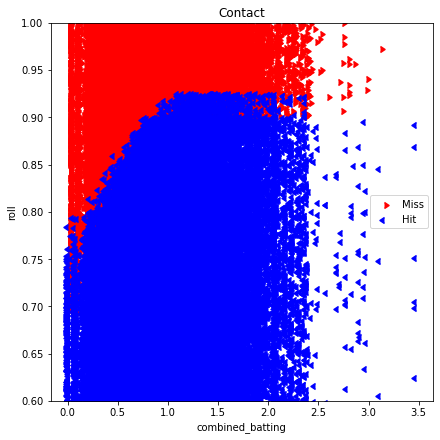

In [22]:
x_val = "combined_batting"
y_val = "roll"
fig, ax = plt.subplots(1, figsize=(6, 6), layout="constrained")
ax.scatter(
    dfc[~dfc["passed"]][x_val],
    dfc[~dfc["passed"]][y_val],
    color="red",
    label="Miss",
    marker=CARETRIGHTBASE,
)
ax.scatter(
    dfc[dfc["passed"]][x_val],
    dfc[dfc["passed"]][y_val],
    color="blue",
    label="Hit",
    marker=CARETLEFTBASE,
)


ax.set_xlabel(x_val)
ax.set_ylabel("roll")
ax.set_title(f"Contact")
ax.set_ylim(0.6, 1)

if x_val == "threshold":
    ax.plot(ax.get_xlim(), ax.get_xlim())

ax.legend()

In [23]:
X = dfc[
    [
        "roll",
        "season",
        "passed",
        "ruth",
        # "combined_batting_1.5",
        # "combined_batting",
        # "combined_batting_0.5",
        # "combined_batting_1.25",
        "combined_batting_1.2",

        "ballpark_sum",
    ]
].copy()
X = X[X['roll'] < 0.925]

pin_intercept = None
# pin_intercept = 0.8
pins = [
    (-0.08, "ruth"),
    (0.16, "ballpark_sum"),
    (0.17, "combined_batting_1.2")
]
for val, var in pins:
    X["roll"] -= X[var] * val
    X = X.drop(var, axis=1)

y = X["passed"]
X = X.drop(["passed", "season"], axis=1)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model


sc = StandardScaler(with_mean=False)
X2 = sc.fit_transform(X)
if pin_intercept is not None:
    X2[:,0] -= pin_intercept / sc.scale_[0]

trainedsvm = svm.LinearSVC(dual=False, max_iter=100000, C=100000000, tol=1e-12,
                           fit_intercept=pin_intercept is None).fit(X2, y)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y, predictionsvm))
print(classification_report(y, predictionsvm))
print(trainedsvm.score(X2, y))

[[ 13628   1483]
 [  1008 203453]]
              precision    recall  f1-score   support

       False       0.93      0.90      0.92     15111
        True       0.99      1.00      0.99    204461

    accuracy                           0.99    219572
   macro avg       0.96      0.95      0.96    219572
weighted avg       0.99      0.99      0.99    219572

0.9886552019383164


In [42]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

intercept = trainedsvm.intercept_# - np.dot(coef, sc.mean_)
intercept_scaled = pin_intercept or -(intercept / coef[0, 0])[0]

# dfc["threshold"] = intercept_scaled
# print("intercept:", intercept_scaled)
# for pair in pins + list(zip(-np.array(coef_list), X.columns)):
#     if pair[1] != "roll":
#         print(pair)
#         dfc["threshold"] += pair[0] * dfc[pair[1]]
def fit_func_cap(row):
    season = row["season"]
    if season in [11, 12, 13]:
        threshold = min(0.9, 
            0.80
            - 0.08*row["ruth"]
            + 0.16*row["ballpark_sum"]
            + 0.16*row["combined_batting_1.2"]
        )
    elif season == 14:
        threshold = min(0.925,
            0.78
            - 0.08*row["ruth"]
            + 0.16*row["ballpark_sum"]
            + 0.17*row["combined_batting_1.2"]
        )
    return threshold

def fit_func(row):
    season = row["season"]
    if season in [11, 12, 13]:
        threshold = (
            0.80
            - 0.08*row["ruth"]
            + 0.16*row["ballpark_sum"]
            + 0.16*row["combined_batting_1.2"]
        )
    elif season == 14:
        threshold = (
            0.78
            - 0.08*row["ruth"]
            + 0.16*row["ballpark_sum"]
            + 0.17*row["combined_batting_1.2"]
        )
    return threshold

dfc["threshold_plot"] = dfc.apply(fit_func, axis=1)
dfc["threshold"] = dfc.apply(fit_func_cap, axis=1)

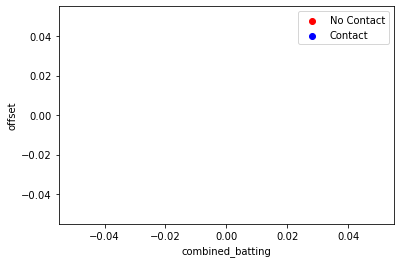

In [43]:
dfc["offset"] = dfc["roll"] - dfc["threshold"]
outliers = dfc[(dfc["passed"] & (dfc["offset"] >= 0)) | (~dfc["passed"] & (dfc["offset"] <= 0))]

fig, ax = plt.subplots(1)
x_val = "combined_batting"
ax.scatter(
    outliers[~outliers["passed"]][x_val],
    outliers[~outliers["passed"]]["offset"],
    color="red",
    label="No Contact",
)
ax.scatter(
    outliers[outliers["passed"]][x_val],
    outliers[outliers["passed"]]["offset"],
    color="blue",
    label="Contact",
)
ax.set_xlabel(x_val)
ax.set_ylabel("offset")
ax.legend()

In [44]:
pd.set_option("display.max_columns", None)
table = outliers[
    [
        "passed",
        "offset",
        # "event_type",
        # "weather",
        # "batter_laserlikeness",
        "roll",
        "threshold",
        "ruth",
        "combined_batting_1.2",
        # "combined_batting",
        # "combined_batting_0.5",
        # "combined_batting_1.25",
        # "combined_batting_0.25",
        "pitcher_multiplier",
        "batter_multiplier",
        "batter_name",
        "pitcher_name",
        "batter_mods",
        "pitcher_mods",
        "batting_team_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
        # "fielder_roll",
    ]
]
print(len(table))
table.sort_values("offset", ascending=False)

0


,passed,offset,roll,threshold,ruth,combined_batting_1.2,pitcher_multiplier,batter_multiplier,batter_name,pitcher_name,batter_mods,pitcher_mods,batting_team_mods,pitching_team_mods,season,day,game_id,play_count


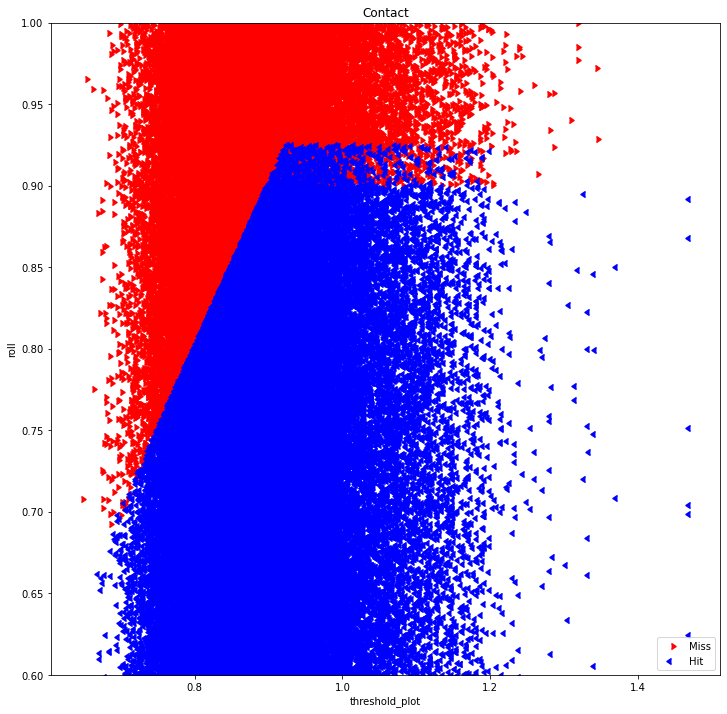

In [45]:
x_val = "threshold_plot"
# x_val = "combined_batting_1.2"
y_val = "roll"
fig, ax = plt.subplots(1, figsize=(12, 12))

ax.scatter(
    dfc[~dfc["passed"]][x_val],
    dfc[~dfc["passed"]][y_val],
    color="red",
    label="Miss",
    marker=CARETRIGHTBASE,
)
ax.scatter(
    dfc[dfc["passed"]][x_val],
    dfc[dfc["passed"]][y_val],
    color="blue",
    label="Hit",
    marker=CARETLEFTBASE,
)
ax.set_xlabel(x_val)
ax.set_ylabel("roll")
ax.set_title(f"Contact")
ax.set_ylim(0.6, 1)

if x_val == "threshold":
    ax.plot(ax.get_xlim(), ax.get_xlim())

ax.legend(loc="lower right")

In [ ]:
# outliers_scatter = outliers.loc[:, [
#     "offset",
#     "batter_buoyancy",
#     "batter_divinity",
#     "batter_martyrdom",
#     "batter_moxie",
#     "batter_musclitude",
#     "batter_patheticism",
#     "batter_thwackability",
#     "batter_tragicness",
#     "batter_vibes",
#     "pitcher_ruthlessness",
#     "pitcher_overpowerment",
#     "pitcher_unthwackability",
#     "pitcher_shakespearianism",
#     "pitcher_suppression",
#     "pitcher_coldness",
#     "pitcher_vibes"
# ]].copy()

In [ ]:
# scatter_matrix(outliers_scatter, alpha=0.2, figsize=(10, 10), diagonal="kde");

In [ ]:
# for col in [
#     "batter_buoyancy",
#     "batter_divinity",
#     "batter_martyrdom",
#     "batter_moxie",
#     "batter_musclitude",
#     "batter_patheticism",
#     "batter_thwackability",
#     "batter_tragicness",
#     "batter_vibes",
#     "pitcher_ruthlessness",
#     "pitcher_overpowerment",
#     "pitcher_unthwackability",
#     "pitcher_shakespearianism",
#     "pitcher_suppression",
#     "pitcher_coldness",
#     "pitcher_vibes"
# ]:
#     plt.figure()
#     plt.plot(outliers_scatter[col], outliers_scatter["offset"],'o')
#     plt.xlabel(col)
#     plt.ylabel('offset')